In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usar um estilo disponível
plt.style.use('seaborn')
sns.set_palette('Set2')
%matplotlib inline


In [2]:
caminho_arquivo = '../Dados/vendas.csv'
df = pd.read_csv(caminho_arquivo)
df.head()

,Data,Produto,Categoria,Quantidade,Preco_Unitario,Cidade
0,2025-06-18,Relógio,Acessórios,4,250,São Paulo
1,2025-05-12,Relógio,Acessórios,2,250,Curitiba
2,2025-05-06,Relógio,Acessórios,1,250,Porto Alegre
3,2025-02-28,Calça Jeans,Roupas,2,120,São Paulo
4,2025-06-15,Jaqueta,Roupas,1,180,Salvador


In [3]:
#Mostrar informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            200 non-null    object
 1   Produto         200 non-null    object
 2   Categoria       200 non-null    object
 3   Quantidade      200 non-null    int64 
 4   Preco_Unitario  200 non-null    int64 
 5   Cidade          200 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [4]:
#Mostrar estatísticas básicas das colunas numéricas
df.describe()

,Quantidade,Preco_Unitario
count,200.000000,200.000000
mean,2.940000,124.450000
std,1.412934,82.423697
min,1.000000,35.000000
25%,2.000000,40.000000
50%,3.000000,120.000000
75%,4.000000,200.000000
max,5.000000,250.000000


In [5]:
#Verificar se há valores nulos em cada coluna
df.isnull().sum()

Data              0
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Cidade            0
dtype: int64

In [6]:
#Converter coluna 'data' para datetime
df['Data'] == pd.to_datetime(df['Data'])

0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Name: Data, Length: 200, dtype: bool

In [7]:
#Criar uma coluna com o 'Faturamento' multiplicando pelo preço unitário
df['Faturamento'] = df['Quantidade'] * df['Preco_Unitario']

In [8]:
#Mostar as 5 primeiras linhas
df.head()

,Data,Produto,Categoria,Quantidade,Preco_Unitario,Cidade,Faturamento
0,2025-06-18,Relógio,Acessórios,4,250,São Paulo,1000
1,2025-05-12,Relógio,Acessórios,2,250,Curitiba,500
2,2025-05-06,Relógio,Acessórios,1,250,Porto Alegre,250
3,2025-02-28,Calça Jeans,Roupas,2,120,São Paulo,240
4,2025-06-15,Jaqueta,Roupas,1,180,Salvador,180


In [9]:
#Mostrar resultado formatado em reais
faturamento_total = df['Faturamento'].sum()
print(f"Faturamento total: R${faturamento_total:,.2f}")

Faturamento total: R$72,970.00


In [10]:
#Garantir que 'Data' está no formato datetime
df['Data'] = pd.to_datetime(df['Data'])

In [11]:
#Criar coluna 'Mes' no formato YYYY-MM
df['Mes'] = df['Data'].dt.to_period('M')

In [12]:
#Calcular faturamento do mês
faturamento_mensal = df.groupby('Mes')['Faturamento'].sum().reset_index()
print(faturamento_mensal)

       Mes  Faturamento
0  2025-01        15420
1  2025-02         6715
2  2025-03        15625
3  2025-04        10275
4  2025-05        12620
5  2025-06        12315


In [13]:
#Produto mais vendido (Quantidade)
produto_mais_vendido = df.groupby('Produto')['Quantidade'].sum().reset_index()

In [14]:
#Ordenar maior para menor
produto_mais_vendido = produto_mais_vendido.sort_values(by = 'Quantidade', ascending = False)

In [15]:
produto_mais_vendido.head()

,Produto,Quantidade
4,Jaqueta,95
2,Camiseta,94
3,Chinelo,90
5,Relógio,87
0,Boné,84


In [16]:
#Agrupando por 'Categoria' e somando 'Faturamento'
faturamento_categoria = df.groupby('Categoria')['Faturamento'].sum().reset_index()

In [17]:
#Ordenar maior para menor faturamento
faturamento_categoria = faturamento_categoria.sort_values(by = 'Faturamento', ascending = False)

In [18]:
faturamento_categoria

,Categoria,Faturamento
2,Roupas,28880
0,Acessórios,24690
1,Calçados,19400


<function matplotlib.pyplot.show(close=None, block=None)>

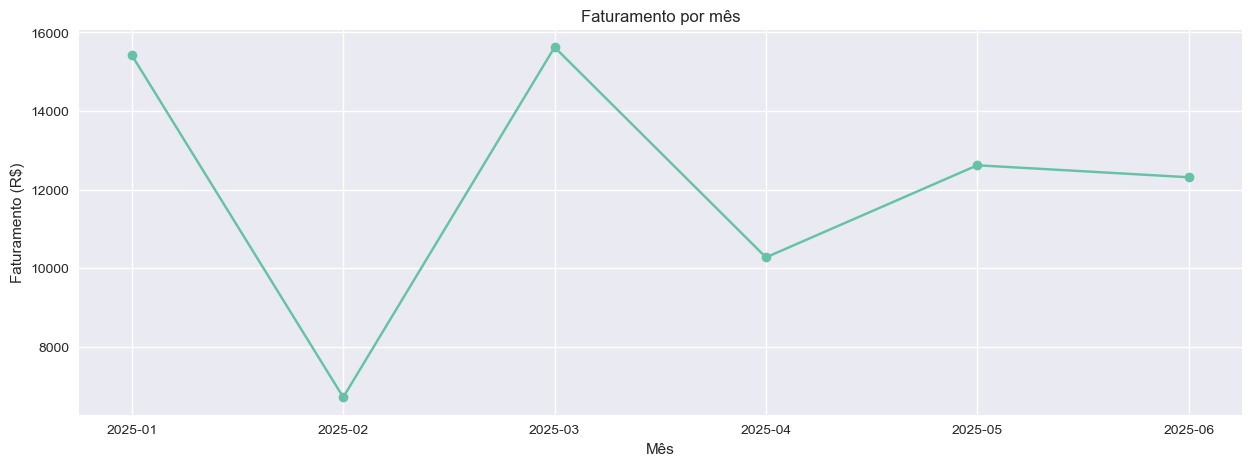

In [19]:
#Vendas por mês e o gráfico
vendas_por_mes = df.groupby('Mes')['Faturamento'].sum().reset_index()
plt.figure(figsize = (15, 5))
plt.plot(vendas_por_mes['Mes'].astype(str), vendas_por_mes['Faturamento'], marker = 'o')
plt.title('Faturamento por mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.show

In [20]:
#Top 5 cidades com maior faturamento
top_cidades = df.groupby('Cidade')['Faturamento'].sum().reset_index()

In [21]:
#Ordenar maior para menor
top_cidades = top_cidades.sort_values(by = 'Faturamento', ascending = False).head(5)

In [22]:
print(top_cidades)

         Cidade  Faturamento
2  Porto Alegre        12635
1      Curitiba        12115
6     São Paulo        10885
5      Salvador        10320
3        Recife        10200


<function matplotlib.pyplot.show(close=None, block=None)>

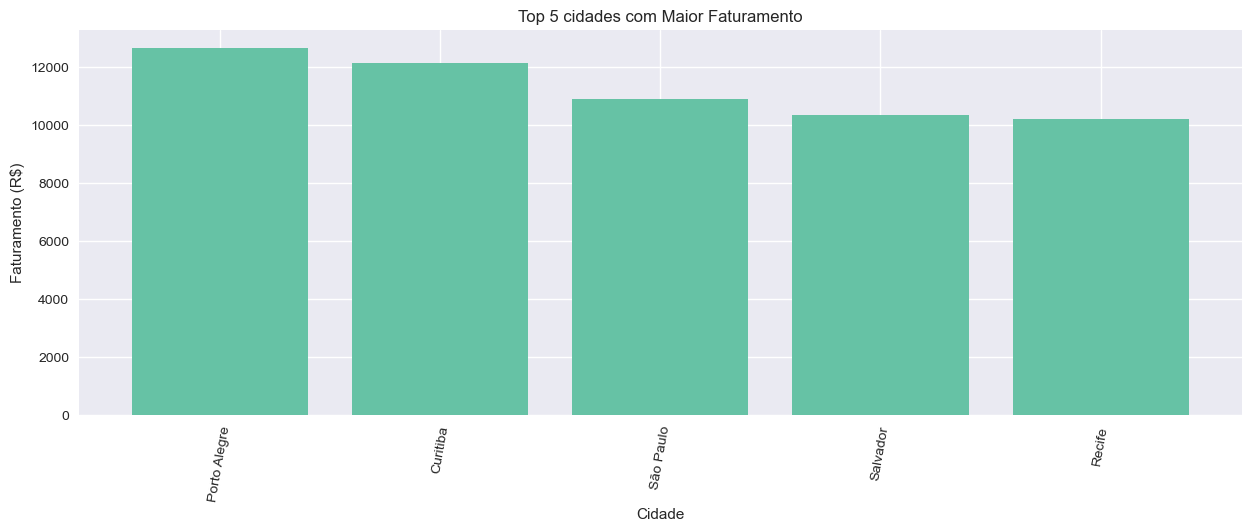

In [23]:
#Gráficos de barras
plt.figure(figsize = (15, 5))
plt.bar(top_cidades['Cidade'], top_cidades['Faturamento'])
plt.title('Top 5 cidades com Maior Faturamento')
plt.xlabel('Cidade')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation = 80)
plt.show